In [5]:
%matplotlib inline

import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

print(tf.__version__)

1.13.1


In [8]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

In [9]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [11]:
train_data.shape

(25000, 10000)

In [12]:
test_data.shape

(25000, 10000)

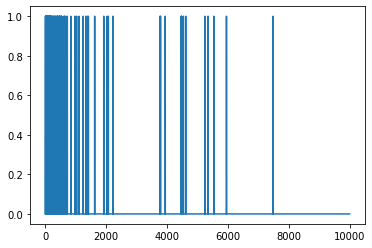

In [16]:
plt.plot(train_data[0])

In [17]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [18]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 4s - loss: 0.4949 - acc: 0.8007 - binary_crossentropy: 0.4949 - val_loss: 0.3379 - val_acc: 0.8768 - val_binary_crossentropy: 0.3379
Epoch 2/20
 - 4s - loss: 0.2510 - acc: 0.9130 - binary_crossentropy: 0.2510 - val_loss: 0.2845 - val_acc: 0.8883 - val_binary_crossentropy: 0.2845
Epoch 3/20
 - 4s - loss: 0.1840 - acc: 0.9355 - binary_crossentropy: 0.1840 - val_loss: 0.2895 - val_acc: 0.8844 - val_binary_crossentropy: 0.2895
Epoch 4/20
 - 4s - loss: 0.1489 - acc: 0.9495 - binary_crossentropy: 0.1489 - val_loss: 0.3169 - val_acc: 0.8768 - val_binary_crossentropy: 0.3169
Epoch 5/20
 - 4s - loss: 0.1214 - acc: 0.9597 - binary_crossentropy: 0.1214 - val_loss: 0.3334 - val_acc: 0.8753 - val_binary_crossentropy: 0.3334
Epoch 6/20
 - 4s - loss: 0.0984 - acc: 0.9696 - binary_crossentropy: 0.0984 - val_loss: 0.3631 - val_acc: 0.8723 - val_binary_crossentropy: 0.3631
Epoch 7/20
 - 4s - l

In [19]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [20]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5585 - acc: 0.7771 - binary_crossentropy: 0.5585 - val_loss: 0.4396 - val_acc: 0.8598 - val_binary_crossentropy: 0.4396
Epoch 2/20
 - 4s - loss: 0.3417 - acc: 0.8960 - binary_crossentropy: 0.3417 - val_loss: 0.3337 - val_acc: 0.8824 - val_binary_crossentropy: 0.3337
Epoch 3/20
 - 4s - loss: 0.2566 - acc: 0.9189 - binary_crossentropy: 0.2566 - val_loss: 0.3012 - val_acc: 0.8860 - val_binary_crossentropy: 0.3012
Epoch 4/20
 - 4s - loss: 0.2129 - acc: 0.9306 - binary_crossentropy: 0.2129 - val_loss: 0.2884 - val_acc: 0.8870 - val_binary_crossentropy: 0.2884
Epoch 5/20
 - 4s - loss: 0.1839 - acc: 0.9404 - binary_crossentropy: 0.1839 - val_loss: 0.2854 - val_acc: 0.8867 - val_binary_crossentropy: 0.2854
Epoch 6/20
 - 4s - loss: 0.1634 - acc: 0.9468 - binary_crossentropy: 0.1634 - val_loss: 0.2882 - val_acc: 0.8852 - val_binary_crossentropy: 0.2882
Epoch 7/20
 - 4s - loss: 0.1459 - acc: 0.9544 - binary_crossentropy:

In [21]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [22]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.3411 - acc: 0.8568 - binary_crossentropy: 0.3411 - val_loss: 0.2948 - val_acc: 0.8786 - val_binary_crossentropy: 0.2948
Epoch 2/20
 - 4s - loss: 0.1399 - acc: 0.9496 - binary_crossentropy: 0.1399 - val_loss: 0.3294 - val_acc: 0.8735 - val_binary_crossentropy: 0.3294
Epoch 3/20
 - 4s - loss: 0.0444 - acc: 0.9874 - binary_crossentropy: 0.0444 - val_loss: 0.4696 - val_acc: 0.8686 - val_binary_crossentropy: 0.4696
Epoch 4/20
 - 4s - loss: 0.0078 - acc: 0.9986 - binary_crossentropy: 0.0078 - val_loss: 0.5753 - val_acc: 0.8694 - val_binary_crossentropy: 0.5753
Epoch 5/20
 - 4s - loss: 0.0013 - acc: 0.9999 - binary_crossentropy: 0.0013 - val_loss: 0.6686 - val_acc: 0.8710 - val_binary_crossentropy: 0.6686
Epoch 6/20
 - 4s - loss: 2.8444e-04 - acc: 1.0000 - binary_crossentropy: 2.8444e-04 - val_loss: 0.7081 - val_acc: 0.8712 - val_binary_crossentropy: 0.7081
Epoch 7/20
 - 4s - loss: 1.5314e-04 - acc: 1.0000 - binary_c

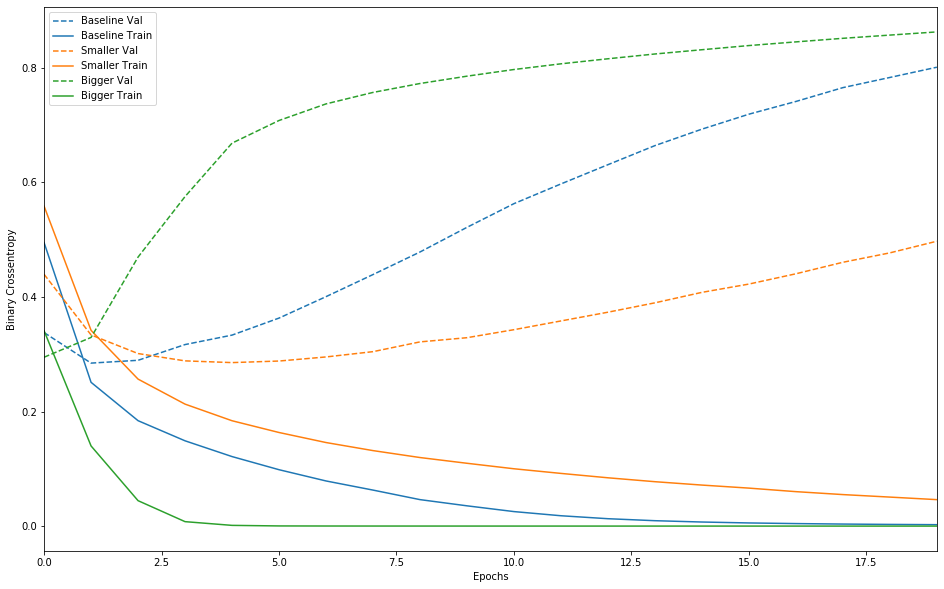

In [24]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [25]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5287 - acc: 0.8070 - binary_crossentropy: 0.4877 - val_loss: 0.3840 - val_acc: 0.8748 - val_binary_crossentropy: 0.3411
Epoch 2/20
 - 4s - loss: 0.3068 - acc: 0.9064 - binary_crossentropy: 0.2593 - val_loss: 0.3380 - val_acc: 0.8869 - val_binary_crossentropy: 0.2870
Epoch 3/20
 - 4s - loss: 0.2546 - acc: 0.9285 - binary_crossentropy: 0.2010 - val_loss: 0.3397 - val_acc: 0.8856 - val_binary_crossentropy: 0.2844
Epoch 4/20
 - 4s - loss: 0.2321 - acc: 0.9392 - binary_crossentropy: 0.1750 - val_loss: 0.3567 - val_acc: 0.8799 - val_binary_crossentropy: 0.2983
Epoch 5/20
 - 4s - loss: 0.2171 - acc: 0.9466 - binary_crossentropy: 0.1577 - val_loss: 0.3676 - val_acc: 0.8772 - val_binary_crossentropy: 0.3073
Epoch 6/20
 - 4s - loss: 0.2054 - acc: 0.9518 - binary_crossentropy: 0.1442 - val_loss: 0.3794 - val_acc: 0.8758 - val_binary_crossentropy: 0.3178
Epoch 7/20
 - 4s - loss: 0.1982 - acc: 0.9534 - binary_crossentropy:

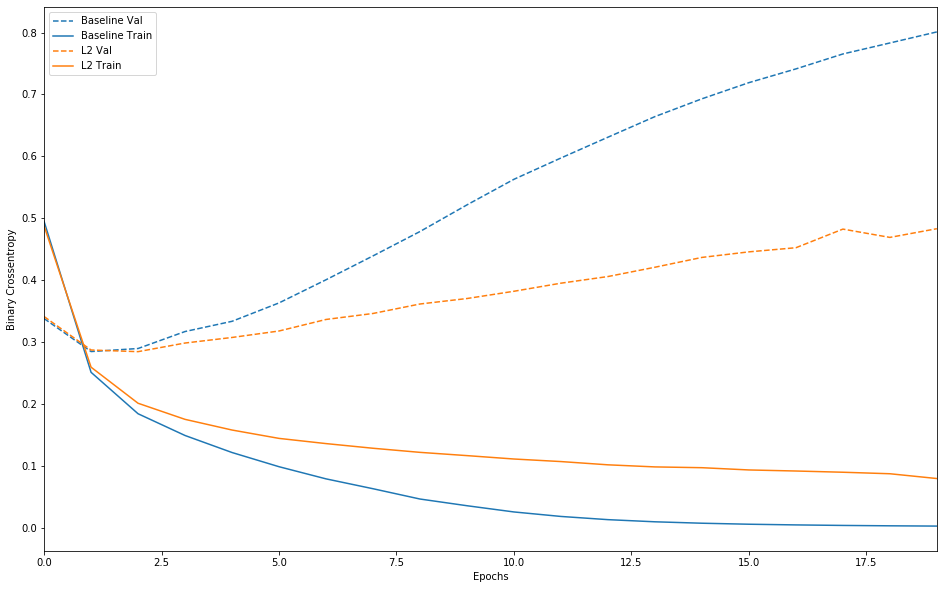

In [26]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [27]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6399 - acc: 0.6256 - binary_crossentropy: 0.6399 - val_loss: 0.5012 - val_acc: 0.8558 - val_binary_crossentropy: 0.5012
Epoch 2/20
 - 4s - loss: 0.4877 - acc: 0.7779 - binary_crossentropy: 0.4877 - val_loss: 0.3609 - val_acc: 0.8805 - val_binary_crossentropy: 0.3609
Epoch 3/20
 - 4s - loss: 0.3817 - acc: 0.8455 - binary_crossentropy: 0.3817 - val_loss: 0.2954 - val_acc: 0.8879 - val_binary_crossentropy: 0.2954
Epoch 4/20
 - 4s - loss: 0.3154 - acc: 0.8805 - binary_crossentropy: 0.3154 - val_loss: 0.2794 - val_acc: 0.8878 - val_binary_crossentropy: 0.2794
Epoch 5/20
 - 4s - loss: 0.2726 - acc: 0.9012 - binary_crossentropy: 0.2726 - val_loss: 0.2726 - val_acc: 0.8887 - val_binary_crossentropy: 0.2726
Epoch 6/20
 - 4s - loss: 0.2380 - acc: 0.9147 - binary_crossentropy: 0.2380 - val_loss: 0.2769 - val

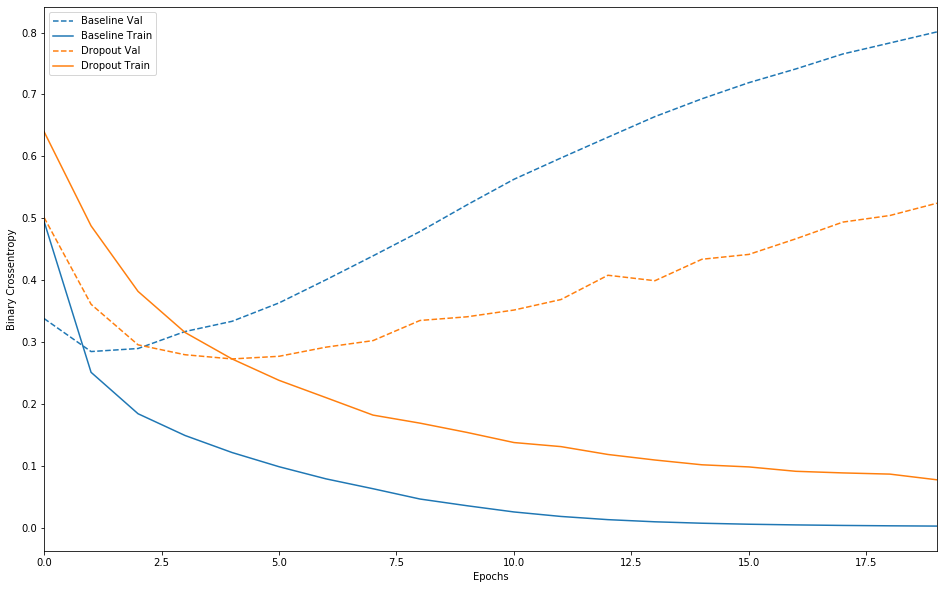

In [28]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])